<a href="https://colab.research.google.com/github/milaomrani/Cavitiy_classification/blob/main/Cavities_image_classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import os

In [ ]:
!unzip /content/drive/MyDrive/DataSet/dental_dataset.zip

In [4]:
ls

drive/  sample_data/  test/  train/


In [5]:
for dir_path, dir_name, file_name in os.walk("/content/dataset"):
  print(f"There are {len(dir_name)} directories and {len(file_name)} images in {dir_path} ")

In [6]:
import pathlib
import numpy as np

data_dir = pathlib.Path("dataset/train/")
class_name = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_name)



[]


In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random


def view_rand_img(target_dir, target_class):
  target_folder = target_dir + target_class

  rand_img = random.sample(os.listdir(target_folder), 1)

  im = mpimg.imread(target_folder + "/" + rand_img[0])
  plt.imshow(im)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {im.shape}")

  return im

Image shape: (360, 480, 3)


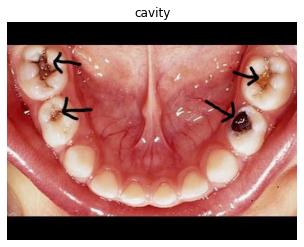

In [12]:
img = view_rand_img("/content/dataset/train/",
                    "cavity")

In [13]:
img

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [14]:
img/255.

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_dir = "/content/dataset/train"
test_dir = "/content/dataset/test"

data_train = train_datagen.flow_from_directory(train_dir,
                                          target_size=(224,224),
                                          batch_size=16,
                                          class_mode="binary",
                                          seed=42)

data_test = test_datagen.flow_from_directory(test_dir,
                                          target_size=(224,224),
                                          batch_size=16,
                                          class_mode="binary",
                                          seed=42)

Found 708 images belonging to 2 classes.
Found 176 images belonging to 2 classes.


In [16]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Activation, Flatten, Dense
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam

In [39]:
model_2 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [40]:
model_2.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [41]:
history_2 = model_2.fit(data_train,
                        steps_per_epoch=len(data_train),
                        epochs=25,
                        validation_data = data_test,
                        validation_steps=len(data_test))

Epoch 1/25
45/45 [==============================] - ETA: 0s - loss: 0.6909 - accuracy: 0.5494

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 10. 
  warnings.warn(str(msg))


45/45 [==============================] - 11s 225ms/step - loss: 0.6909 - accuracy: 0.5494 - val_loss: 0.6913 - val_accuracy: 0.5852
Epoch 2/25
45/45 [==============================] - 13s 293ms/step - loss: 0.6890 - accuracy: 0.5537 - val_loss: 0.6877 - val_accuracy: 0.5682
Epoch 3/25
45/45 [==============================] - 10s 225ms/step - loss: 0.6883 - accuracy: 0.5579 - val_loss: 0.6850 - val_accuracy: 0.5795
Epoch 4/25
45/45 [==============================] - 10s 227ms/step - loss: 0.6736 - accuracy: 0.5706 - val_loss: 0.7708 - val_accuracy: 0.5568
Epoch 5/25
45/45 [==============================] - 12s 255ms/step - loss: 0.6838 - accuracy: 0.5664 - val_loss: 0.6736 - val_accuracy: 0.5682
Epoch 6/25
45/45 [==============================] - 11s 246ms/step - loss: 0.6654 - accuracy: 0.5706 - val_loss: 0.6596 - val_accuracy: 0.5682
Epoch 7/25
45/45 [==============================] - 10s 226ms/step - loss: 0.6514 - accuracy: 0.5932 - val_loss: 0.6592 - val_accuracy: 0.5625
Epoch 8/25

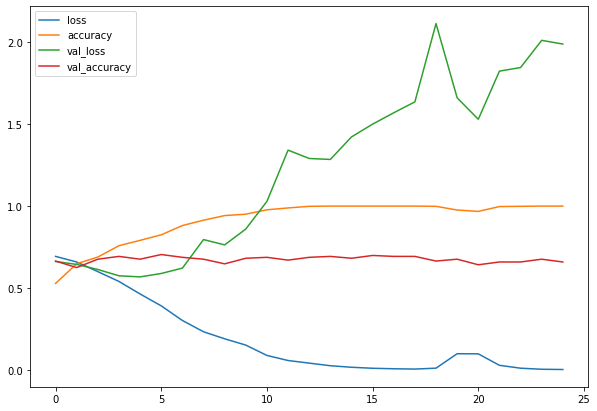

In [42]:
import pandas as pd

pd.DataFrame(history_1.history).plot(figsize=(10, 7))

In [28]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

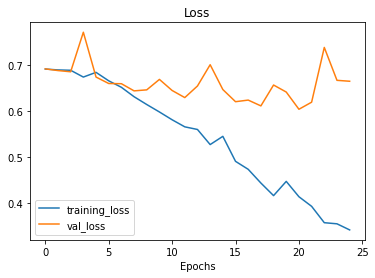

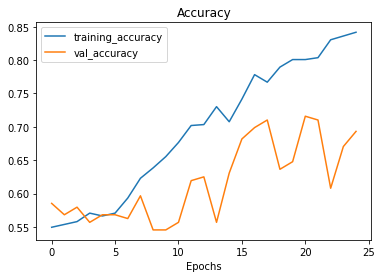

In [43]:
# plot_loss_curves(history_1), 
plot_loss_curves(history_2)